In [1]:
import matplotlib.pyplot as plt
import neuralnetwork as nn
from train import train_network
import preprocess as pp
import torch

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from load_data import load_dataset

dataset = load_dataset("../models/realTimeData.csv")
dataset

[(tensor([-2.8440, -0.4330,  1.4710, -3.7060, -4.8460,  0.9550,  1.3140, -1.1380,
          -1.7170,  1.4480, -0.0370,  0.3340,  1.0410, -2.5860, -1.0150, -1.2730,
           0.9070,  0.9590,  2.7390, -1.2020,  1.8600, -1.1640,  1.8260, -0.6610,
           2.9220, -1.0670, -0.3110,  3.6550, -2.3120,  1.7760,  1.4100, -1.4410]),
  0),
 (tensor([ 0.7450,  0.5920, -0.0680,  0.3960, -2.7920,  1.9790,  1.8250, -2.6740,
          -2.2280, -1.1150,  2.0120, -3.7650, -0.4970, -0.0220, -1.5260, -0.7590,
           1.4190,  2.4950,  3.7610,  0.8480, -1.7280,  0.8870,  0.2880,  2.9260,
          -0.6670,  2.0070,  1.7390, -0.9590,  3.8380,  0.7490,  0.3840,  1.1210]),
  0),
 (tensor([-1.3050, -0.9460,  0.9570,  1.4200,  1.8220, -0.0720,  0.2860, -0.6220,
          -0.1760,  1.4470,  2.5220, -1.2000,  0.5280,  1.5150, -1.5250,  1.8030,
          -3.1930,  0.4430, -2.9030, -0.6900, -3.7760,  3.9590,  1.3120,  1.3860,
          -0.1550,  1.4930,  2.7620, -0.9580,  2.8100, -2.3250, -0.6410,  2.6570])

100%|██████████| 100/100 [00:01<00:00, 61.50it/s]


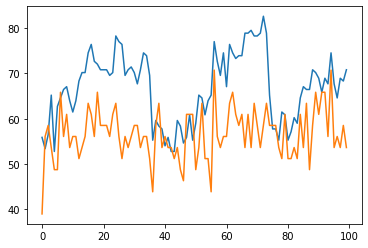

In [3]:
train_set, test_set = pp.split_data(dataset)

network = nn.LabelNetwork(label_count=2)
network, train_accuracies, test_accuracies = train_network(train_set, test_set, epoch=100, batch_size=32, learning_rate=0.05, network=network)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

In [4]:
torch.save(network.state_dict(), "../models/realtime.pt")